In [4]:
from __future__ import division
import numpy as np

def linearized_init(M, m, l, q1, q2, q3, q4, r):
    """
    Parameters:
    ----------
    M, m: floats
        masses of the rickshaw and the present
    l : float
        length of the rod
    q1, q2, q3, q4, r : floats
        relative weights of the position and velocity of the rickshaw,
        the angular displacement theta and the change in theta, and the
        control
    
    Return
    -------
    A : ndarray of shape (4,4)
    B : ndarray of shape (4,1)
    Q : ndarray of shape (4,4)
    R : ndarray of shape (1,1)
    """
    g = 9.8
    
    A = np.array([[0,1,0,0],
                  [0,0,m*g/M,0],
                  [0,0,0,1],
                  [0,0,g/(M*l)*(M+m), 0]])
    B = np.array([[0],[1/M],[0],[1/(M*l)]])
    Q = np.diag([q1,q2,q3,q4])
    R = r
    
    return A,B,Q,R

In [63]:
from scipy.optimize import root
def find_P(A, B, Q, R):
    """
    Parameters:
    ----------
    A, Q : ndarrays of shape (4,4)
    B : ndarray of shape (4,1)
    R : ndarray of shape (1,1)
    
    Returns
    -------
    P : the matrix solution of the Riccati equation
    """
    def f(P_guess):
        P = P_guess.reshape((4,4))
        
        eq = P.dot(A) + A.T.dot(P) + Q - 1/R*P.dot(B).dot(B.T).dot(P)    
        return eq.reshape(16)
    
    return root(f, np.ones(16)).x.reshape((4,4))

In [64]:
M, m = 23., 5.
l = 4.
q1, q2, q3, q4 = 1., 1., 1., 1.
r = 5.

In [65]:
A,B,Q,R = linearized_init(M,m,l,q1,q2,q3,q4,r)
P = find_P(A,B,Q,R)

In [66]:
import scipy.linalg as la
print la.eig(A - 1/R*B.dot(B.T).dot(P))[0]

[-1.72947252+0.j         -0.08977145+0.08895376j -0.08977145-0.08895376j
  1.72460188+0.j        ]


Therefore, $\dot{\tilde{z}}$ will not necessarily go to 0 since one of the eigenvalues is greater than 0.

In [73]:
def rickshaw(tv, X0, A, B, Q, R, P):
    """
    Parameters:
    ----------
    tv : ndarray of time values, with shape (n+1,)
    X0 : Initial conditions on state variables
    A, Q: ndarrays of shape (4,4)
    B : ndarray of shape (4,1)
    R : ndarray of shape (1,1)
    P : ndarray of shape (4,4)
    Returns
    -------
    Z : ndarray of shape (n+1,4), the state vector at each time
    U : ndarray of shape (n+1,), the control values
    """
    f = lambda z,t : (A - 1/R*B.dot(B.T).dot(P)).dot(z)
    Z = odeint(f, X0, tv)
    U = -1/R*B.T.dot(P).dot(Z.T)
    return Z,U.T

In [74]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt

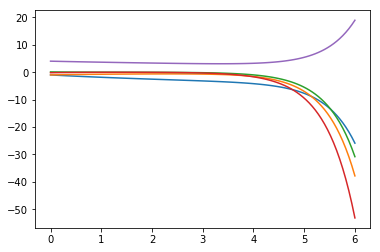

In [75]:
M, m = 23., 5.
l = 4.
q1, q2, q3, q4 = 1., 1., 1., 1.
r = 10.
X0 = np.array([-1, -1, .1, -.2])
A,B,Q,R = linearized_init(M,m,l,q1,q2,q3,q4,r)
P = find_P(A,B,Q,R)
Z,U = rickshaw(np.linspace(0,6,101), X0, A, B, Q, R, P)
plt.plot(np.linspace(0,6,101), Z)
plt.plot(np.linspace(0,6,101), U)
plt.show()

In [80]:
A,B,Q,R = linearized_init(M,m,l,q1,q2,q3,q4,r)
P = la.solve_continuous_are(A,B,Q,np.array(R).reshape((1,1)))
Z,U = rickshaw(np.linspace(0,60,101), X0, A, B, Q, R, P)
plt.plot(np.linspace(0,60,101), Z)
plt.plot(np.linspace(0,60,101), U)
plt.show()

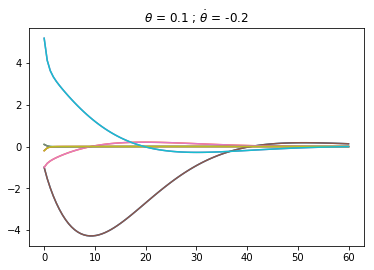

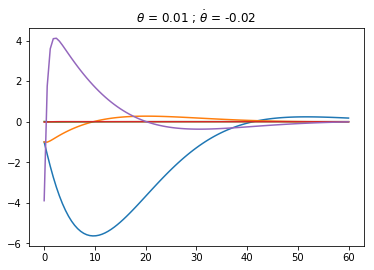

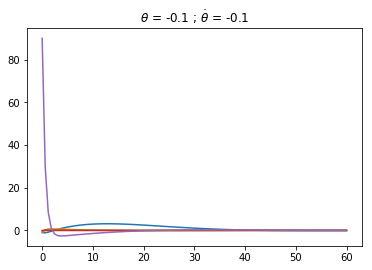

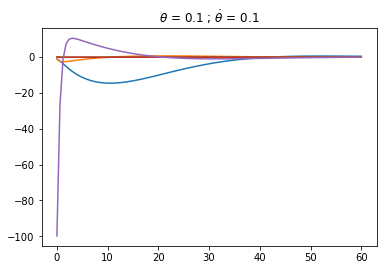

In [89]:
M, m = 23., 5.
l = 4.
q1, q2, q3, q4 = 1., 1., 1., 1.
r = 10.
tf = 60
for theta, theta_dot in [(.1,-.2), (0.01,-0.02), (0,0), (-.1,-.1), (.1,.1)]:
    X0 = np.array([-1, -1, theta, theta_dot])
    A,B,Q,R = linearized_init(M,m,l,q1,q2,q3,q4,r)
    P = la.solve_continuous_are(A,B,Q,np.array(R).reshape((1,1)))
    Z,U = rickshaw(np.linspace(0,60,101), X0, A, B, Q, R, P)
    plt.plot(np.linspace(0,60,101), Z)
    plt.plot(np.linspace(0,60,101), U)
    plt.title("$\\theta$ = " + str(theta) + " ; $\\dot{\\theta}$ = " + str(theta_dot))
    plt.show()
    